# 1er TP de sistemas inteligentes

Nombre: BARAFANI, Facundo

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

Este conjunto de datos contiene detalles de los clientes de un banco y la variable objetivo es una variable binaria que refleja si el cliente abandonó el banco (cerró su cuenta) o si continúa siendo un cliente. En base a esta informacion:

Siendo la clase positiva la indicación que el cliente cerró la cuenta ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de precision alto?


url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/Churn_Modelling.csv'

<10%>
Respuesta:

In [613]:
# Se le esta pidiendo al clasificador que en sea preciso a la hora de dar resultados, es decir que sea bajo el porcentaje de ocurrencias en las que indica que es clase negativa y que el cliente no abandono el banco cuando en realidad si lo hizo.
# Que la tasa de clase positiva sea alta: es decir que sea preciso a la hora de decir que un cliente abandono el banco sea con alta precision.
# Adicionalmente tambien proporcionar patrones que permitan identificar cuando un cliente es propenso a abandonar el banco.

### Obtención de datos
Importe las librerías a utilizar:

In [614]:
import pandas as pd

Importe los datos:

In [615]:
url = "https://gitlab.com/francisco.arduh/datasets/-/raw/main/Churn_Modelling.csv"
df = pd.read_csv(url)

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [616]:
# Para realizar una exploración de los datos a nivel general podemos usar funciones como head(), describe(), display(), etc.

# ACLARACION: Las distintas opciones varian en los resultados que proveen pero todos son utiles para llevar a cabo un analisis general de nuestro dataset
# previo a comenzar a limpiar y modelar los datos.

df.head() # opcion 1

df.describe() # opcion 2

display(df) # opcion 3

df.value_counts # opcion 4

df.info() # opcion 5

df.describe() # en este caso uso describe porque lo considero el mas abarcativo

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


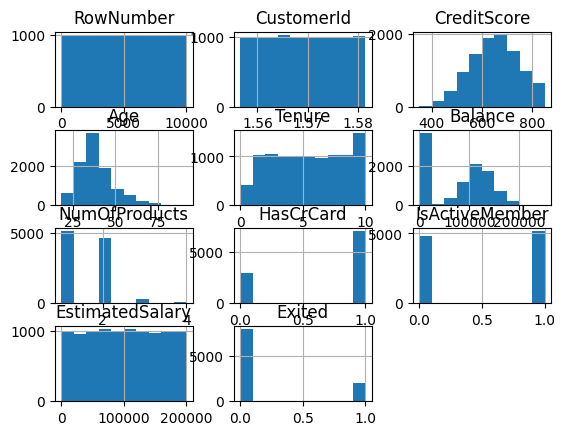

In [617]:
# Podemos realizar histogramas tambien para un vistazo general:

import matplotlib.pyplot as plt # para esto importamos la libreria para hacer graficos

df.hist() # El histograma nos va a ayudar a analizar las distintas distribuciones de las columnas de nuestro dataset

plt.show()

# Viendo el histograma podemos ver de que hay columnas como 'isActiveMember', 'Exited' y 'HasCrCard' que almacenan variables binarias, siendo '1' para indicar el caso positivo y siendo '0' para indicar el caso negativo.

# Otro aspecto que se puede observar es que columnas como 'RowNumber', 'CustomerId' y 'EstimatedSalary' cuentan con muchos valores unicos, incluso en casos como 'RowNumber' y 'CustomerId' todos los valores son unicos ya que la primera indica el numero de fila de nuestro dataset y la segunda indica un identificador univoco para cada cliente que se encuentra en el dataset.

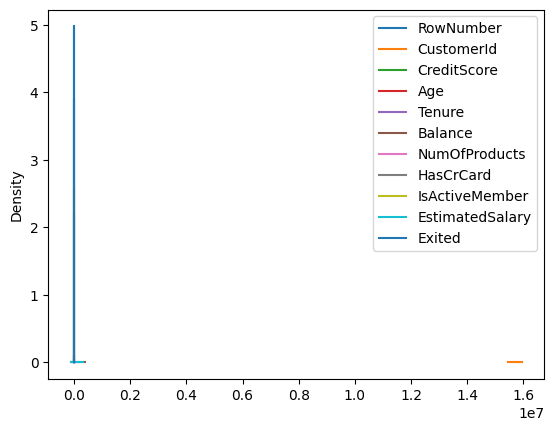

In [618]:
# Hacemos un diagrama de densidad
df.plot(kind='density')
plt.show()

In [619]:
# Para buscar datos nulos podemos hacer uso del metodo 'isnull()' que basicamente nos devuelve si hay datos vacios dentro de nuestro dataset

nil_values = df.isnull()

# Hacemos un count de la nueva variable para saber si hay datos nulos y en caso de que los haya tambien.

nil_values_count = nil_values.sum()

print(nil_values_count) # Podemos ver en este caso que no hay ningun valor nulo en nuestro dataset


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


<5%> Separar X_train, y_train, X_test, y_test

In [620]:
# Se realiza la separacion de los datos en X e y: siendo X nuestro input, es decir los valores que le vamos a ingresar al modelo para luego clasificarlo
# y luego tenemos la variable y que en este caso seria nuestro 'target' u objetivo, es decir con el que vamos a validar con el output luego de pasar por nuestro modelo
# de clasificacion.

# El enunciado menciona que la variable objetivo en este caso es si el cliente abandona el banco o no, por lo cual en nuestro target(y) vamos a almacenar la
# columna 'Exited'.

# Para esto lo asignamos a la nueva variable 'y' de la siguiente manera:

y = df["Exited"].copy() # copiamos para no alterar el dataset inicial

# validamos que se almaceno de manera correcta:

# podemos observar que es una variable binaria como se menciono anteriormente donde '1' indica que el cliente abandono y '0' en el caso de que no lo haya hecho.

In [621]:
# Ahora procedemos a preparar nuestra variable 'X':

# Primero como una buena practica copiamos el dataset y lo asignamos en la variable X como una buena practicas:

X = df.copy()

# Segundo tenemos que remover la variable que separamos en el target, en este caso 'Exited':

X = df.drop('Exited', axis=1) # Hacemosuso del metodo drop, que basicamente elimina y en este caso le pasamos como parametro 'axis=1' donde basicamente le indicamos
# que lo haga en forma de columna

# Comprobamos que se haya realizado con exito:

X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

In [622]:
# Variables irrelevantes: ['RowNumber', 'CustomerId', 'Surname']

# 'RowNumber' ya que solo indica el numero de la columna del dataset
# 'CustomerId' ya que sirve para identificar univocamente al cliente
# 'Surname' ya que el apellido del cliente no va a tener ninguna relación con nuestro modelo de clasificacion

# Para eliminarlas usamos el metodo .drop():

X = X.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Variables categoricas: ['Geography', 'Gender']

# Para estas variables categoricas podemos codificarlos usando por ejemplo 'OneHotEncoder' u 'OrdinalEncoder' para poder
# transformar las variables categoricas en variables numericas.

# En este caso lo vamos a hacer con el metodo 'get_dummies()' de pandas que simplifica la implementacion y lo que hace es:
# reemplaza las variables categoricas por True o False:

X = pd.get_dummies(X, columns= ['Geography', 'Gender'])

# Usamos el 'StandardScaler' para escalar nuestras variables numericas:

# importamos el 'StandardScaler'
from sklearn.preprocessing import StandardScaler

# creamos el scaler
StandardScaler()
scaler = StandardScaler() # esto basicamente lo que hace es remover la media y lo escala a su varianza unitaria (z = (x - u) / s)
# se lo aplicamos a nuestro input
X_scaled = scaler.fit_transform(X)

# Al aplicar el scaler se convirtio en dato de tipo 'numpy.ndarray' para convertirlo de nuevo en dataframe hacemos:
X = pd.DataFrame(X_scaled, columns=X.columns)

# Verificamos:

X.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988


In [623]:
# Ahora procedemos a hacer el test y el train set, es decir generar nuestro dataset de prueba y el de entrenamiento de nuestro modelo.
# Es decir un fragmento del dataset lo vamos a dedicar a el entrenamiento de nuestro modelo de predicción y el resto para luego validar
# las predicciones que nuestro modelo arroja y asi evaluar su eficacia.

# Para esto primero importamos 'test_train_split' de scikit que basicamente nos realiza lo que se menciona arriba:

from sklearn.model_selection import train_test_split

# Lo dividimos de la siguiente manera: usamos el parametro 'test_size' para indicarle que vamos a usar un 80% de nuestro dataset
# para entrenamiento y un 20% para prueba, y utilizamos la seed '42' para la generación de la misma (random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobamos que haya funcionado
X_train.head()

y_train.head()

9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [624]:
# ACLARACIÓN: Se realizo en la seccion anterior

### Selección de modelo y entrenamiento
 


In [625]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier()

# Entrenamos el modelo para regresion logistica:
cla_log.fit(X_train, y_train)

# Hacemos predicciones en el set de prueba
log_y_pred = cla_log.decision_function(X_test)

# Entrenamos el modelo para usar Random Forest
cla_rf.fit(X_train, y_train)

rf_y_pred = cla_rf.predict_proba(X_test)

<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

In [626]:
# Realizamos validación cruzada comenzando por el modelo de regresión logistica:

# Importamos el modulo para hacer validacion cruzada
from sklearn.model_selection import cross_val_score

# para usar el area bajo la curva roc mas alto le tenemos que pasar como parametro a 'scoring' 'roc_auc'
cross_val_score(cla_log, X_train, y_train, cv=3, scoring = "roc_auc")

array([0.75220976, 0.7688553 , 0.76147274])

In [627]:
# Hacemos el cross validation predict para el modelo de regresion logistica
from sklearn.model_selection import cross_val_predict

cross_val_predict(cla_log, X_train, y_train, cv=3, method="decision_function")

array([-3.41152315, -1.39246047, -2.27564601, ..., -1.41058621,
       -0.94749821, -0.77082859])

In [628]:
# para usar el area bajo la curva roc mas alto le tenemos que pasar como parametro a 'scoring' 'roc_auc'
cross_val_score(cla_rf, X_train, y_train, cv=3, scoring = "roc_auc")

array([0.84091535, 0.85373257, 0.84489827])

In [629]:
# Hacemos el cross validation predict para el modelo de decision forest
cross_val_predict(cla_log, X_train, y_train, cv=3, method="predict_proba")

array([[0.96806273, 0.03193727],
       [0.80098475, 0.19901525],
       [0.90683987, 0.09316013],
       ...,
       [0.80385839, 0.19614161],
       [0.72061177, 0.27938823],
       [0.68370011, 0.31629989]])

In [630]:
# ROC es una metrica que se usa comunmente para medir la calidad de nuestros modelos de clasificacion donde basicamente lo que nos indica es
# la capacidad de nuestro modelo de distinguir entre clases positivas y negativas.

# Entonces si elegimos un modelo con el area bajo la curva roc mas alta quiere decir que este tiene mayor capacidad para distinguir entre las clases positiva y negativa
#Por lo tanto, elegir el modelo con el área bajo la curva ROC más alta indica que ese modelo tiene la capacidad más alta de distinguir entre las clases positiva y negativa.

# En resumen nos va a asegurar una mayor calidad de predicción de nuestra clase positiva.

# Por lo que nos vamos a inclinar por el RandomForest

<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [631]:
# Comenzamos usando grid search sobre el modelo elegido, en este

# importamos GridSearch

from sklearn.model_selection import GridSearchCV

# Definimos los parametros que le vamos a pasar, en este
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

# Llevamos a cabo el grid search para encontrar la mejor combinacion de  hiperparametros:
gridsearch = GridSearchCV(cla_rf, param_grid, cv= 3)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 100]}])

In [632]:
# El proposito de esto es para poder encontrar la mejor combinacion de hiperparametros para nuestro modelo dandonos un modelo mas preciso.

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

In [633]:
# Hacemos las predicciones en las regiones de validacion
gridsearch_y_pred = gridsearch.predict(X_train)

In [634]:
# Calculamos el accuracy

accuracy = accuracy_score(y_train, gridsearch_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.999875


In [635]:
# Calculamos el recall
from sklearn.metrics import recall_score

recall = recall_score(y_train, gridsearch_y_pred)

print(recall)

# Arrojando un 1 indica que clasifico en un 100% los verdaderos positivos

0.9993917274939172


In [636]:
# Calculamos el recall
from sklearn.metrics import f1_score

f1 = f1_score(y_train, gridsearch_y_pred)

print(f1)

# el f1 score combina el accuracy score con el recall. Arrojando un valor de 1 indica que el modelo es perfecto prediciendo en datos de entrenamiento

0.9996957712199573


In [637]:
# Calculamos el roc_auc score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train, gridsearch_y_pred)

print(roc_auc)

# Este score mide la capacidad que tiene el modelo de distinguir entre la clase positiva y negativa, en este caso indicando que es perfectamente preciso
# para datos de entrenamiento

0.9996958637469586


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [638]:
# Hacemos las predicciones en las regiones de prueba
gridsearch_y_pred_test = gridsearch.predict(X_test)

In [639]:
# Calculamos el accuracy

accuracy = accuracy_score(y_test, gridsearch_y_pred_test)
print('Accuracy:', accuracy)

Accuracy: 0.866


In [640]:
# Calculamos el recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, gridsearch_y_pred_test)

print(recall)

# Arrojando un 0.48 indica que clasifico en un 48% los verdaderos positivos

0.49872773536895676


In [641]:
# Calculamos el recall
from sklearn.metrics import f1_score

f1 = f1_score(y_test, gridsearch_y_pred_test)

print(f1)

# Se continua viendo como el score para el set de prueba no arroja un score cercano a cuando lo hicimos para el set de entrenamiento,
# la posible razon de esto se explica al final.

0.593939393939394


In [642]:
# Calculamos el roc_auc score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, gridsearch_y_pred_test)

print(roc_auc)

# Se continuan viendo scores mas bajos para el set de prueba a diferencia del set de entrenamiento

0.7272730151642544


In [643]:
# La diferencia significativa entre estos es que puede ser que este ocurriendo lo que se denomina 'overfitting'. Esto pasa cuando el modelo se ajusta demasiado bien a los
# datos de entrenamiento pero no tiene el mismo rendimiento en la prueba